In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy.linalg as lg

# Bonjour ceci est un test


## Exo 2.16

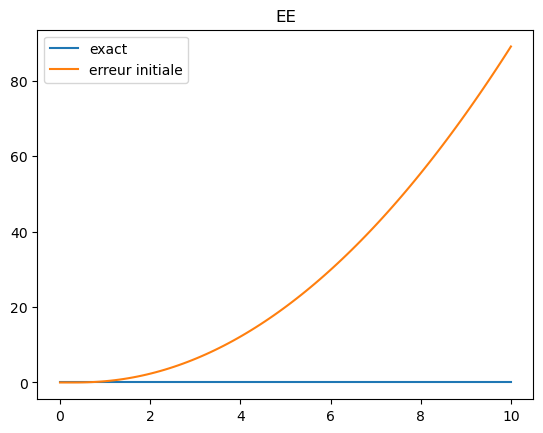

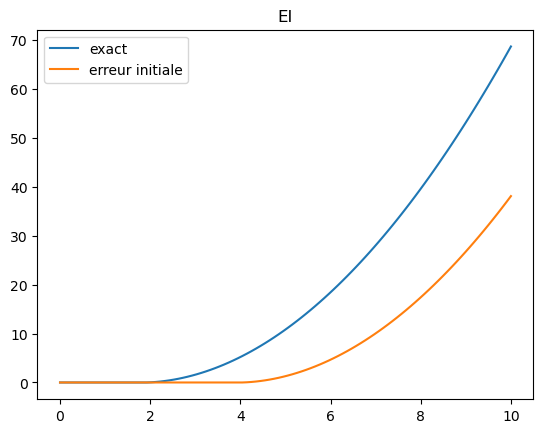

In [9]:
## Exo 2.16
f = lambda x,t : np.array([2*np.sqrt(np.abs(x[0]))])
def df(x,t):
    if x[0] != 0 :
        return np.array([np.sign(x[0])/(np.sqrt(np.abs(x[0])))])
    else :
        return np.zeros(1)

T = 10 #final time
N = 100 #number of points
h = T/N #step size
x0, x0_erreur = np.array([0]),np.array([np.sqrt(2.)*np.sqrt(2.)-2.])
vt = np.linspace(0,T,N)



# Explicit Euleur

ee = EE(f,x0,vt)
ee_erreur = EE(f,x0_erreur,vt)

plt.figure(1)
plt.clf()
plt.title("EE")
plt.plot(vt, ee, label = "exact")
plt.plot(vt, ee_erreur, label = "erreur initiale")
plt.legend()
plt.show()




# Implicit Euler


p = 3/N

x0, x0_erreur = 0.,np.sqrt(2.)*np.sqrt(2.)-2.
ei = [x0]
x = 0
for t in vt[:-1]:
    ind = np.random.binomial(1,p)
    if x == 0 :
        if ind == 1:
            x = 2*h**2 + x + 2*h*np.sqrt(x+h**2)
        else :
            x = 0
    else :
        x = 2*h**2 + x + 2*h*np.sqrt(x+h**2)
    ei.append(x)
ei = np.array(ei)




ei_erreur = [x0_erreur]
x = 0
for t in vt[:-1]:
    ind = np.random.binomial(1,p)
    if x == 0 :
        if ind == 1:
            x = 2*h**2 + x + 2*h*np.sqrt(x+h**2)
        else :
            x = 0
    else :
        x = 2*h**2 + x + 2*h*np.sqrt(x+h**2)
    ei_erreur.append(x)
ei_erreur = np.array(ei_erreur)





plt.figure(2)
plt.clf()
plt.title("EI")
plt.plot(vt, ei, label = "exact")
plt.plot(vt, ei_erreur, label = "erreur initiale")
plt.legend()
plt.show()





## Exo 2.17
### Implémentation des méthodes

In [11]:

## Implémentation des méthodes

def EE(f,x0,vt):
    vx = [x0]
    x = x0
    for k in range(len(vt)-1):
        x = x +(vt[k+1]-vt[k])*f(x,vt[k])
        vx.append(x)
    return np.array(vx)


def EI(f,df,x0, vt, itmax = 100, eps = 10**-6):
    vx = [x0]
    x = x0
    n = x0.shape[0]
    for k in range(len(vt)-1):
        t = vt[k+1]
        h = vt[k+1]-vt[k]
        # Resolution de y = y + (vt[k+1]-vt[k])*f(y,t) par Newton
        i = 0
        err_newton = 1
        y = x # on initialise proche de l'itérée pcdt

        while i < itmax and err_newton > eps:

            F = y - x - h*f(y,t+h)
            DF = np.eye(n) - h*df(y,t+h) # matrice carrée
            y_stock = y
            y = y - lg.solve(DF,F) # résoudre un syst lin est bien moins coûteux que d'inverser
            i = i+1
            err_newton = lg.norm(y-y_stock)
        x = y
        vx.append(x)
    return np.array(vx)

def Heun(f,x0,vt):
    vx = [x0]
    x = x0
    for k in range(len(vt)-1):
        x = x + (vt[k+1]-vt[k])/2*(f(x,vt[k]) + f(x + (vt[k+1]-vt[k])*f(x,vt[k]),vt[k]))
        vx.append(x)
    return np.array(vx)

def RK4(f,x0,vt):
    vx = [x0]
    x = x0
    for k in range(len(vt)-1):
        t = vt[k]
        t_next = vt[k+1]
        h = t_next - t
        K1 = f(x,t)
        K2 = f(x+h*K1/2,t+h/2)
        K3 = f(x+h*K2/2,t+h/2)
        K4 = f(x + h*K3, t_next)
        x = x + h/6*(K1+2*K2+2*K3+K4)
        vx.append(x)
    return np.array(vx)



### Quelques courbes d'approximations de $S(t)$

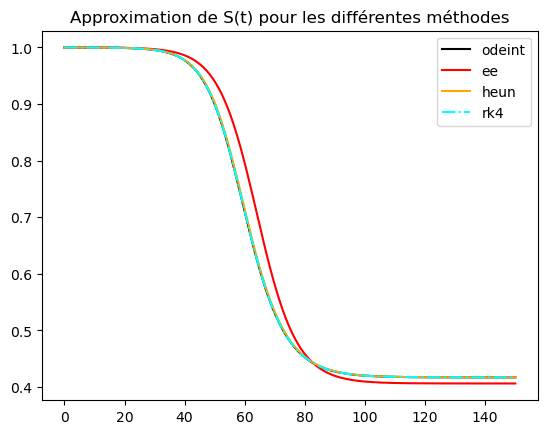

In [12]:

## Exo 2.17 SIR, q1 : exhiber les courbes


S0 = 10**6
I0 = 10.
R0 = 0.
N0 = S0 + I0 + R0
x0 = np.array([S0/N0,I0/N0,R0/N0])
beta = 1./2
gamma = 1./3


f = lambda x,t : np.array([-beta*x[0]*x[1],beta*x[0]*x[1] -gamma*x[1],gamma*x[1]])

T0 = 0
T = 150
odeint_nbr_points = 150
h = T/odeint_nbr_points
vt = np.linspace(T0,T,odeint_nbr_points)



vx_odeint =  odeint(f,x0,vt)
vx_ee = EE(f,x0,vt)
#vx_ei = EI(f,df,x0,vt)
vx_rk4 = RK4(f,x0,vt)
vx_heun = Heun(f,x0,vt)


plt.figure(3)
plt.clf()
plt.plot(vt,vx_odeint[:,0], label = "odeint", color = "black")
plt.plot(vt,vx_ee[:,0], label = "ee", color  ="red")
plt.plot(vt,vx_heun[:,0], label = "heun", color = "orange")
plt.plot(vt,vx_rk4[:,0], label = "rk4", color = "cyan", linestyle = "-.")
plt.title("Approximation de S(t) pour les différentes méthodes")
plt.legend()

plt.show()



### Q2 : Erreur de convergence

J'ai ici pris des pas différents de l'énoncé. C'est donc normal si vous obtenez des courbes différentes sur RK4 notamment.

La petite formule à appliquer pour retrouver l'ordre de convergence de notre méthode :

On applique le log à l'égalité suivante, où $\alpha$ est inconnu.
$$Err_h \simeq C h^\alpha$$

On obtient :
$$\log(Err_h) \simeq \alpha \log(h)+ cst$$
En faisant le taux d'accroissement entre deux points $h_1$ et $h_2$, on obtient :

$$ \alpha = \frac{\log(Err_{h_1}) - \log(Err_{h_1})}{\log(h_1)- \log(h_2)} $$

**Remarque :** Notre comparaison à la solution "exacte" donnée par `odeint` atteint ses limites avec RK4 (on ne trouve pas d'influence du pas sur l'erreur convergence de la méthode).


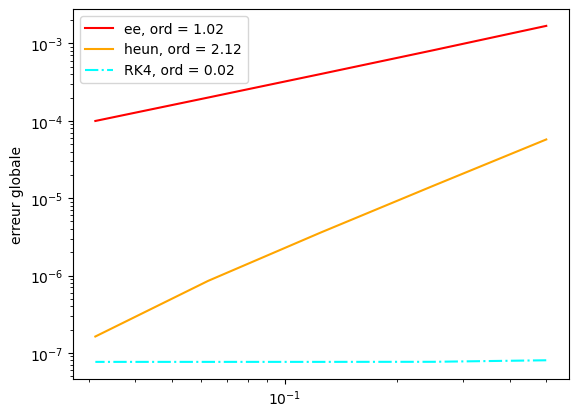

In [17]:

## q2

S0 = 10**6
I0 = 10.
R0 = 0.
N0 = S0 + I0 + R0
x0 = np.array([S0/N0,I0/N0,R0/N0])
beta = 1./2
gamma = 0.33


# On calcule la solution avec odeint à T0 = 52

T0 = 52
T = 60
h_exact = 0.0001
N_exact = int(T0/h_exact)+1
vt_exact = np.linspace(0,T0, N_exact)
new_x0 = odeint(f,x0,vt_exact)[-1]

# Calcul des differentes méthodes avec cette nouvelle condition initiale

x0 = new_x0
K = np.arange(1,6)
H = 2.**(-K)
ERR_EE = []
ERR_Heun = []
ERR_RK4 = []


for h in H:
    N = int((T-T0)/h)+1
    vt = np.linspace(T0,T,N)

    vx_odeint =  odeint(f,x0,vt)
    vx_ee = EE(f,x0,vt)
    vx_heun = Heun(f,x0,vt)
    vx_rk4 = RK4(f,x0,vt)

    ERR_EE.append(lg.norm(lg.norm(vx_ee-vx_odeint, ord  =2, axis = 1 ),ord = np.inf))
    ERR_Heun.append(lg.norm(lg.norm(vx_heun-vx_odeint, ord  =2, axis = 1 ),ord = np.inf))
    ERR_RK4.append(lg.norm(lg.norm(vx_rk4-vx_odeint, ord  =2, axis = 1 ),ord = np.inf))
    # max des ||yk - y(tk)||

plt.figure(4)
plt.clf()

# Calcul des ordres. Polyfit serait mieux
ordre_EE = (np.log(ERR_EE[-1])- np.log(ERR_EE[0]))/(K[-1]- K[0])/(-np.log(2))
ordre_Heun = (np.log(ERR_Heun[-1])- np.log(ERR_Heun[0]))/(K[-1]- K[0])/(-np.log(2))
ordre_RK4 = (np.log(ERR_RK4[-1])- np.log(ERR_RK4[0]))/(K[-1]- K[0])/(-np.log(2))


# Tracé de l'erreur 

plt.loglog(H, ERR_EE, color  ="red", label  ="ee, ord = {:1.2f}".format(ordre_EE))
plt.loglog(H, ERR_Heun, color  ="orange", label = "heun, ord = {:1.2f}".format(ordre_Heun))
plt.loglog(H, ERR_RK4, color  ="cyan", linestyle = "-.", label = "RK4, ord = {:1.2f}".format(ordre_RK4))
plt.legend()
plt.xlabel("")
plt.ylabel("erreur globale")
plt.show()






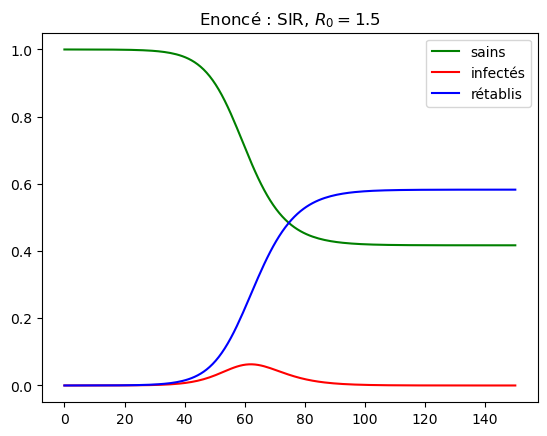

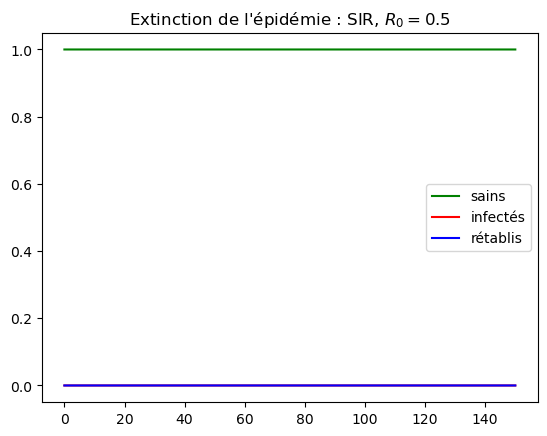

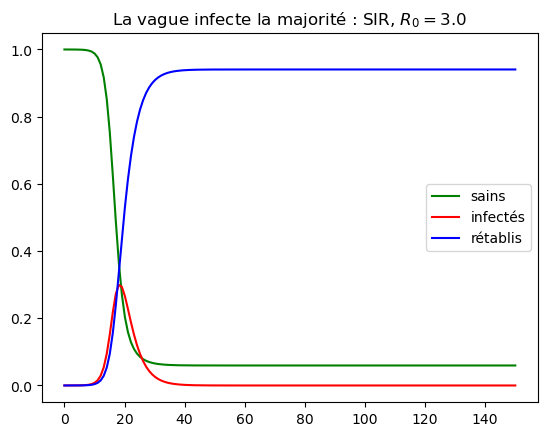

In [20]:


## q3
# On veut comparer l'impact à l'équilibre de a et r ()



S0 = 10**6
I0 = 10.
R0 = 0.
N0 = S0 + I0 + R0
x0 = np.array([S0/N0,I0/N0,R0/N0])

T0 = 0
T = 150
odeint_nbr_points = 150
vt = np.linspace(T0,T,odeint_nbr_points)


# Enoncé
beta = 1./2 # a une influence sur la valeur du plateau + tps caractéristique. TERME CONTAGION/INTERACTIONS
gamma = 1./3 # sans rétablissement le virus gagne. 1/2 --> pas d'épidémie. TERME VACCINATION
R0  = beta/gamma
g = lambda x : np.array([-beta*x[0]*x[1],beta*x[0]*x[1] -gamma*x[1],gamma*x[1]])
f = lambda x,t: g(x)
vx_odeint =  odeint(f,x0,vt)

plt.figure(1)
plt.clf()
plt.plot(vt,vx_odeint[:,0], label = "sains", color = "green")
plt.plot(vt,vx_odeint[:,1], label = "infectés", color = "red")
plt.plot(vt,vx_odeint[:,2], label = "rétablis", color = "blue")
plt.title(r"Enoncé : SIR, $R_0 = ${:}".format(R0))
plt.legend()


# Haute vaccination
beta = 1./2 
gamma = 1. 
R0  = beta/gamma
g = lambda x : np.array([-beta*x[0]*x[1],beta*x[0]*x[1] -gamma*x[1],gamma*x[1]])
f = lambda x,t: g(x)
vx_odeint =  odeint(f,x0,vt)

plt.figure(2)
plt.clf()
plt.plot(vt,vx_odeint[:,0], label = "sains", color = "green")
plt.plot(vt,vx_odeint[:,1], label = "infectés", color = "red")
plt.plot(vt,vx_odeint[:,2], label = "rétablis", color = "blue")
plt.title(r"Extinction de l'épidémie : SIR, $R_0 = ${:}".format(R0))
plt.legend()


# Haute contagion

beta = 1.
gamma = 1./3
R0  = beta/gamma 
g = lambda x : np.array([-beta*x[0]*x[1],beta*x[0]*x[1] -gamma*x[1],gamma*x[1]])
f = lambda x,t: g(x)
vx_odeint =  odeint(f,x0,vt)

plt.figure(3)
plt.clf()
plt.plot(vt,vx_odeint[:,0], label = "sains", color = "green")
plt.plot(vt,vx_odeint[:,1], label = "infectés", color = "red")
plt.plot(vt,vx_odeint[:,2], label = "rétablis", color = "blue")
plt.title(r"La vague infecte la majorité : SIR, $R_0 = ${:}".format(R0))
plt.legend()








## Exo 2.19 : stabilité absolue

Si on voit l'EDO $\dot z = iz$ en terme de parties réelle $x$ et imaginaire $y$, alors on obtient dans le plan $\R^2$ l'équation :
$$ \dot x = -y, ~~  \dot y = x $$

De solution :
$$ x(t) = cos(t), ~~ y(t) = sin(t)$$

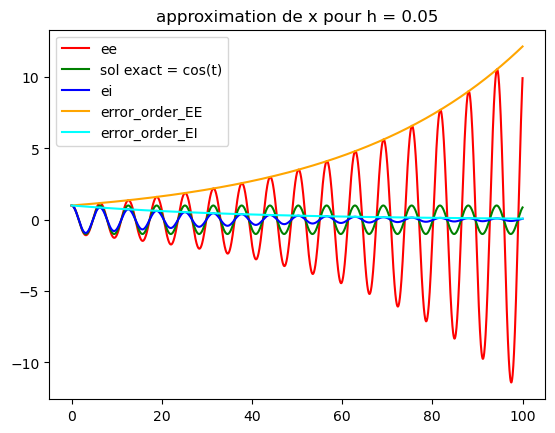

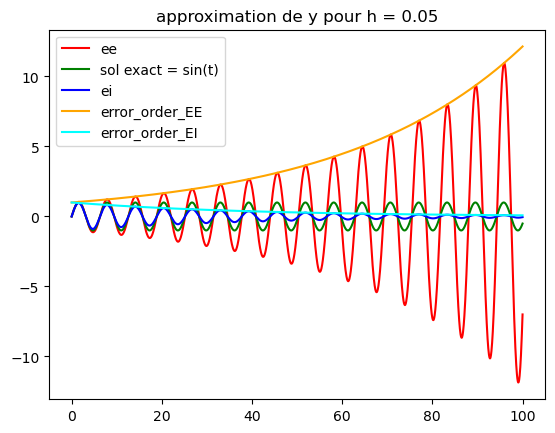

In [ ]:
## Exo 3 : stabilité

T = 100
h = 0.05
N = int(T/h)+1

vt = np.linspace(0,T,N)

f = lambda x,t : np.array([-x[1], x[0]])
df = lambda x,t : np.array([[0,-1],[1,0]]).dot(x)
x0 = np.array([1,0])
sol_exacte = lambda t : np.array([np.cos(t), np.sin(t)])



vx_ee = EE(f,x0,vt)
vx_ei = EI(f,df,x0, vt)
vx_exact = sol_exacte(vt).T

raison_ee = lg.norm(np.array([1,h]))
raison_ei = 1/lg.norm(np.array([1,-h]))
RAISON_EE = raison_ee**np.arange(0,len(vt))
RAISON_EI = raison_ei**np.arange(0,len(vt))


# tracé en x
plt.figure(7)
plt.clf()

plt.plot(vt,vx_ee[:,0], label = "ee", color = "red")
plt.plot(vt, vx_exact[:,0], label = "sol exact = cos(t)", color = "green")
plt.plot(vt, vx_ei[:,0], label = "ei", color = "blue")

plt.plot(vt,RAISON_EE,label = "error_order_EE", color = "orange")
plt.plot(vt,RAISON_EI,label = "error_order_EI", color = "cyan")


plt.title("approximation de x pour h = {:}".format(h))
plt.legend()
plt.show()


## tracé en y
plt.figure(8)
plt.clf()

plt.plot(vt,vx_ee[:,1], label = "ee", color = "red")
plt.plot(vt, vx_exact[:,1], label = "sol exact = sin(t)", color = "green")
plt.plot(vt, vx_ei[:,1], label = "ei", color = "blue")

plt.plot(vt,RAISON_EE,label = "error_order_EE", color = "orange")
plt.plot(vt,RAISON_EI,label = "error_order_EI", color = "cyan")



plt.title("approximation de y pour h = {:}".format(h))
plt.legend()
plt.show()


